In [69]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
sys.path.append("FixedStrides")
from main import *
# results_au = pd.read_csv('ipResults_home_gtx980_australia.csv', sep=';')
results_au_32bit = pd.read_csv('ip_32bit_au.csv', sep=';')
results_tokyo = pd.read_csv('ip_32bit_tokyo.csv', sep=';')
results_au_32bit.drop(results_au_32bit.columns[len(results_au_32bit.columns)-1], axis=1, inplace=True)  # delete NaN column
results_tokyo.drop(results_tokyo.columns[len(results_tokyo.columns)-1], axis=1, inplace=True)  # delete NaN column

In [70]:
def plot_prefix_distribution(prefixes):
    lengths = []
    for p in prefixes:
        len_p = len(p)
        if len_p > len(lengths):
            lengths.extend([0] * (len_p - len(lengths)))
        lengths[len_p - 1] += 1
    plt.bar(range(1, len(lengths) + 1), lengths, align='center')
    plt.xlabel('Prefix length in bits')
    plt.ylabel('Num occurrences')
    plt.title('Prefix length distribution')
    plt.show()

In [71]:
prefixes_tokyo = utils.get_binary_prefixes_from_file(file_name='FixedStrides/data/data-raw-table_tokyo_012016.txt')
prefixes_au = utils.get_binary_prefixes_from_file(file_name='FixedStrides/data/data-raw-table_australia_012016.txt')

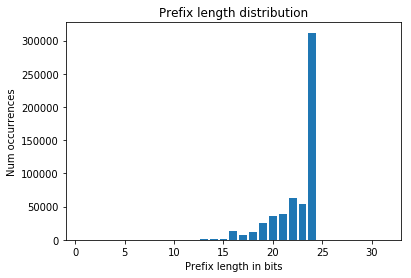

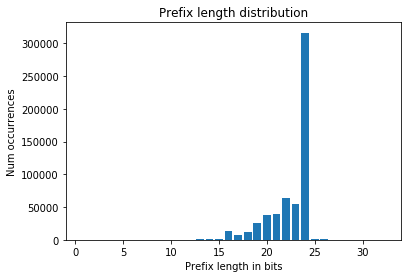

In [72]:
plot_prefix_distribution(prefixes_au)
plot_prefix_distribution(prefixes_tokyo)

In [73]:
strides_tokyo, nodes_tokyo = fixed_strides(prefixes_tokyo)

In [74]:
strides_au, nodes_au = fixed_strides(prefixes_au)

In [75]:
def append_stats(row: pd.Series, nodes: list):
    strides = row['Config'].replace('{', ' ').replace('}',' ').replace(',',' ').split()
    strides = [int(x) for x in strides]
    tmp, strides_nodes, cost, percent = get_stats(nodes, strides)
    build_and_find = float(row['Build']) + float(row['Find'])
    build_and_match = float(row['Build']) + float(row['Match'])
    return pd.Series([cost, percent, build_and_find, build_and_match])
    

In [76]:
newcol_names = ['Cost', 'Percent', 'BuildAndFind', 'BuildAndMatch']
newcols_au = results_au_32bit.apply(lambda row: append_stats(row, nodes_au), axis=1)
newcols_tokyo = results_tokyo.apply(lambda row: append_stats(row, nodes_tokyo), axis=1)
newcols_au.columns = newcol_names
newcols_tokyo.columns = newcol_names
results_au_32bit = results_au_32bit.join(newcols_au)
results_tokyo = results_tokyo.join(newcols_tokyo)

Maximum key length: 31 
Input strides: [16, 16] 
Number of nodes at each level of 1-bit trie: [1, 2, 4, 7, 14, 28, 56, 111, 209, 403, 775, 1464, 2726, 5044, 9200, 16296, 21023, 33666, 52057, 73037, 96912, 130048, 155767, 199188, 99, 89, 92, 64, 43, 33, 4] 
Number of nodes in each level of strides trie: [65536, 1377763328] 
Total number of units needed in 1 bit trie: 1596924 
Total number of units needed in strides trie: 1377828864 
Saved -1376231940 nodes
Strides trie is: 86280.17764151581% the size of 1 bit trie
Maximum key length: 31 
Input strides: [16, 16] 
Number of nodes at each level of 1-bit trie: [1, 2, 4, 7, 14, 28, 56, 111, 209, 403, 775, 1464, 2726, 5044, 9200, 16296, 21023, 33666, 52057, 73037, 96912, 130048, 155767, 199188, 99, 89, 92, 64, 43, 33, 4] 
Number of nodes in each level of strides trie: [65536, 1377763328] 
Total number of units needed in 1 bit trie: 1596924 
Total number of units needed in strides trie: 1377828864 
Saved -1376231940 nodes
Strides trie is: 8628

In [95]:
results_au_32bit = results_au_32bit.sort_values('BuildAndMatch')
results_tokyo = results_tokyo.sort_values('BuildAndMatch')

In [98]:
results_au_32bit[['Config', 'Match', 'Find', 'BuildAndFind', 'BuildAndMatch', 'Build', 'TreeMemoryUniqueOnly', 'TreeLevels', 'RandomMatch', 'RandomSort', 'RandomSortedMatch']]

,Config,Match,Find,BuildAndFind,BuildAndMatch,Build,TreeMemoryUniqueOnly,TreeLevels,RandomMatch,RandomSort,RandomSortedMatch
9,"{14, 5, 5, 8}",2.246688,35.470497,52.316257,19.092448,16.845760,2660524,"{1,201,2220,222,}",4.389248,3.470528,4.341792
4,"{16, 4, 4, 8}",1.571104,34.376289,51.984802,19.179617,17.608513,2865772,"{1,425,4268,222,}",31.965471,3.612192,31.761728
5,"{16, 2, 2, 4, 8}",1.564896,26.634016,45.227200,20.158080,18.593184,2874092,"{1,425,1195,4268,222,}",31.772896,5.618880,31.429920
10,"{12, 4, 4, 4, 8}",1.584352,34.252575,53.014015,20.345792,18.761440,2628980,"{1,124,425,4268,222,}",1.511936,4.595584,1.214144
16,"{8, 8, 4, 4, 8}",1.597152,34.166782,53.663198,21.093568,19.496416,2645972,"{1,40,425,4268,222,}",8.332448,4.520416,8.320672
3,"{16, 4, 2, 2, 8}",0.933728,32.958977,53.528258,21.503009,20.569281,3058292,"{1,425,4268,16556,222,}",31.309889,4.606528,31.440512
13,"{7, 7, 4, 4, 2, 8}",0.994240,32.487873,53.351520,21.857887,20.863647,2784980,"{1,40,201,1195,16556,222,}",3.846528,5.205760,1.305632
11,"{6, 6, 4, 4, 4, 8}",1.795552,34.547871,55.599327,22.847008,21.051456,2623452,"{1,40,124,425,4268,222,}",1.247488,5.269792,0.567616
6,"{16, 2, 2, 2, 2, 8}",0.939424,25.698561,47.720705,22.961568,22.022144,3066612,"{1,425,1195,4268,16556,222,}",32.039391,5.862944,31.631201
1,"{16, 8, 8}",10.418144,58.045982,71.922590,24.294752,13.876608,2966436,"{1,425,222,}",33.027359,3.198240,31.720160


In [97]:
results_tokyo[['Config', 'Match', 'Find', 'BuildAndFind', 'BuildAndMatch', 'Build', 'TreeMemoryUniqueOnly', 'TreeLevels', 'Cost', 'Percent']]

,Config,Match,Find,BuildAndFind,BuildAndMatch,Build,TreeMemoryUniqueOnly,TreeLevels,Cost,Percent
4,"{16, 4, 4, 8}",1.567296,35.093216,51.946943,18.421023,16.853727,3015816,"{1,945,5078,1559,}",2.256192e+06,137.935352
9,"{14, 5, 5, 8}",2.298048,35.604576,53.133728,19.827200,17.529152,2849040,"{1,407,3001,1559,}",2.969632e+06,181.552472
5,"{16, 2, 2, 4, 8}",1.609024,27.549536,46.467585,20.527073,18.918049,3016840,"{1,945,1931,5078,1559,}",2.212360e+06,135.255623
3,"{16, 4, 2, 2, 8}",1.064352,34.744640,55.009857,21.329569,20.265217,3189568,"{1,945,5078,17394,1559,}",1.698412e+06,103.834717
16,"{8, 8, 4, 4, 8}",1.611168,35.562752,55.296992,21.345408,19.734240,2797048,"{1,41,945,5078,1559,}",2.244160e+06,137.199759
10,"{12, 4, 4, 4, 8}",1.576864,35.521183,55.818655,21.874336,20.297472,2782048,"{1,166,945,5078,1559,}",2.238464e+06,136.851527
13,"{7, 7, 4, 4, 2, 8}",1.029184,32.930080,54.015232,22.114336,21.085152,2926160,"{1,38,407,1931,17394,1559,}",1.907892e+06,116.641560
11,"{6, 6, 4, 4, 4, 8}",1.655488,35.811584,56.535680,22.379584,20.724096,2774408,"{1,32,166,945,5078,1559,}",2.238016e+06,136.824138
17,"{8, 8, 4, 2, 2, 8}",0.995680,35.091679,56.776671,22.680672,21.684992,2970800,"{1,41,945,5078,17394,1559,}",1.686380e+06,103.099124
0,"{16, 16}",10.603104,60.140896,73.276704,23.738912,13.135808,2577168,"{1,945,}",1.406075e+09,85962.291097


In [80]:
results_au_32bit = results_au_32bit.sort_values('TreeMemoryUniqueOnly')
results_tokyo = results_tokyo.sort_values('TreeMemoryUniqueOnly')

In [81]:
results_au_32bit[['Config', 'TreeMemoryUniqueOnly', 'Match', 'TreeMemory', 'TreeLevels', 'ChildrenMemory', 'ChildrenCountsMemory', 'ScanMemory', 'PreScanMemory', 'PermuationMemory', 'LengthsMemory', 'MasksPartsMemory', 'ContainerSumMemory', 'ContainerItemsMemory', 'ContainerStartsMemory', 'ContainerLengthsMemory']]

,Config,TreeMemoryUniqueOnly,Match,TreeMemory,TreeLevels,ChildrenMemory,ChildrenCountsMemory,ScanMemory,PreScanMemory,PermuationMemory,LengthsMemory,MasksPartsMemory,ContainerSumMemory,ContainerItemsMemory,ContainerStartsMemory,ContainerLengthsMemory
14,"{8, 8, 16}",2309620,10.439872,9101008,"{1,40,425,}",42000,12,12,12,2263796,2263796,2263796,2267584,2263796,1900,1888
0,"{16, 16}",2529420,10.420672,9320808,"{1,425,}",262152,8,8,8,2263796,2263796,2263796,2267244,2263796,1728,1720
11,"{6, 6, 4, 4, 4, 8}",2623452,1.795552,9414840,"{1,40,124,425,4268,222,}",318824,24,24,24,2263796,2263796,2263796,2304556,2263796,20392,20368
10,"{12, 4, 4, 4, 8}",2628980,1.584352,9420368,"{1,124,425,4268,222,}",324704,20,20,20,2263796,2263796,2263796,2304216,2263796,20220,20200
20,"{4, 4, 4, 4, 4, 4, 4, 4}",2631476,1.698304,9422864,"{1,16,40,124,425,4268,222,57,}",326200,32,32,32,2263796,2263796,2263796,2305180,2263796,20708,20676
16,"{8, 8, 4, 4, 8}",2645972,1.597152,9437360,"{1,40,425,4268,222,}",342368,20,20,20,2263796,2263796,2263796,2303544,2263796,19884,19864
9,"{14, 5, 5, 8}",2660524,2.246688,9451912,"{1,201,2220,222,}",375448,16,16,16,2263796,2263796,2263796,2285028,2263796,10624,10608
19,"{4, 4, 4, 4, 8, 8}",2717436,10.661248,9508824,"{1,16,40,124,425,222,}",446824,24,24,24,2263796,2263796,2263796,2270540,2263796,3384,3360
15,"{8, 8, 8, 8}",2746636,10.964960,9538024,"{1,40,425,222,}",477208,16,16,16,2263796,2263796,2263796,2269380,2263796,2800,2784
13,"{7, 7, 4, 4, 2, 8}",2784980,0.994240,9576368,"{1,40,201,1195,16556,222,}",375272,24,24,24,2263796,2263796,2263796,2409636,2263796,72932,72908


In [92]:
results_tokyo[['Config', 'TreeMemoryUniqueOnly', 'Match', 'Find', 'ChildrenMemory', 'ContainerStartsMemory', 'ContainerLengthsMemory', 'Cost', 'Percent']]

,Config,TreeMemoryUniqueOnly,Match,Find,ChildrenMemory,ContainerStartsMemory,ContainerLengthsMemory,Cost,Percent
14,"{8, 8, 16}",2358400,10.686304,60.451935,43024,3984,3972,1.406063e+09,85961.555504
0,"{16, 16}",2577168,10.603104,60.140896,262152,3808,3800,1.406075e+09,85962.291097
11,"{6, 6, 4, 4, 4, 8}",2774408,1.655488,35.811584,404584,31196,31172,2.238016e+06,136.824138
10,"{12, 4, 4, 4, 8}",2782048,1.576864,35.521183,412512,31056,31036,2.238464e+06,136.851527
16,"{8, 8, 4, 4, 8}",2797048,1.611168,35.562752,428512,30556,30536,2.244160e+06,137.199759
9,"{14, 5, 5, 8}",2849040,2.298048,35.604576,501784,19920,19904,2.969632e+06,181.552472
20,"{4, 4, 4, 4, 4, 4, 4, 4}",2869952,1.738976,35.740864,499512,31496,31464,2.000448e+06,122.300096
13,"{7, 7, 4, 4, 2, 8}",2926160,1.029184,32.930080,447944,85392,85368,1.907892e+06,116.641560
12,"{7, 7, 2, 2, 2, 2, 2, 8}",2958568,1.093504,25.379135,432104,109508,109476,1.640340e+06,100.284406
17,"{8, 8, 4, 2, 2, 8}",2970800,0.995680,35.091679,463080,100144,100120,1.686380e+06,103.099124


In [83]:
results_au_32bit['TreeMemoryUniqueOnly'].corr(results_au_32bit['Match'])

-0.30935224154469604

In [84]:
results_au_32bit['TreeMemoryUniqueOnly'].corr(results_au_32bit['Find'])

-0.6468594384901641

In [85]:
results_au_32bit['TreeMemoryUniqueOnly'].corr(results_au_32bit['Build'])

0.7244974205457491

In [86]:
results_tokyo.columns

Index(['deviceId', 'deviceName', 'Dictionary', 'Load', 'Count', 'Sort',
       'Config', 'Reshape', 'Build', 'TreeMemory', 'TreeLevels', 'Depth',
       'TreeMemoryUniqueOnly', 'ChildrenMemory', 'ChildrenCountsMemory',
       'ScanMemory', 'PreScanMemory', 'PermuationMemory', 'LengthsMemory',
       'MasksPartsMemory', 'ContainerSumMemory', 'ContainerItemsMemory',
       'ContainerStartsMemory', 'ContainerLengthsMemory', 'Find', 'Match',
       'RandomCount', 'RandomMatch', 'RandomSort', 'RandomSortedMatch',
       'HitRate', 'Cost', 'Percent', 'BuildAndFind', 'BuildAndMatch'],
      dtype='object')

In [87]:
# results_tokyo[['Config', 'Build', 'Cost', 'Percent', 'TreeMemory','BuildAndFind', 'Match', 'Find', 'RandomMatch', 'RandomSortedMatch']]

In [88]:
# results_au_32bit[['Config', 'Build', 'TreeMemory', 'Match', 'Find','BuildAndFind','RandomCount', 'RandomMatch', 'RandomSort', 'RandomSortedMatch', 'HitRate', 'Cost', 'Percent']]